In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [3]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
#from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()


In [5]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [6]:
# mat1=scipy.io.loadcsv('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/sub_wise_process_TT/S1_tr.csv')
# nina_raw_train=mat1['Training_process_data']
# # # nina_raw_valid=mat1['Valid_raw_data']
# nina_raw_test=mat1['Testing_process_data'] 
# print('raw_Train_data',nina_raw_train)
# # # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [7]:
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv", nina_raw_train, delimiter=",")
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv", nina_raw_test, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [8]:
# file_path_Train= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv"
# file_path_Test= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv"
# file_path_Valid= "/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv"
# file_path_Train= "./nina_pro_Train_E123.csv"
# file_path_Test= "./nina_pro_Test_E123.csv"
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
#plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)
# LABELS = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12','13',\
# '14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',\
# '29','30','31','32','33','34','35','36','37','38','39','40','41','42','43',\
# '44','45','46','47','48','49','50','51','52']
#LABELS = np.asarray(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [9]:
# The number of steps within one time segment
TIME_PERIODS = 20
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 10
N_FEATURES = 10

In [10]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'Class_label']


In [11]:
def read_data_Train(file_path_Train):
#     column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [12]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [13]:
def read_data_Test(file_path_Test):
#     column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [14]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [15]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [16]:
df_Train = read_data_Train('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_process_TT/Train_data.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 4914000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


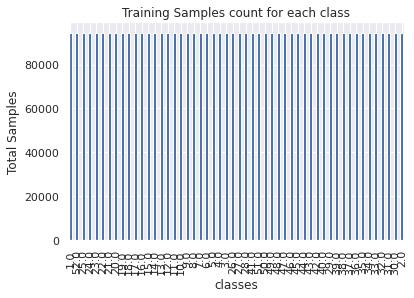

In [17]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [18]:
df_Test = read_data_Test('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_process_TT/Test_data.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)


Number of columns in the dataframe: 11
Number of rows in the dataframe: 2106000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


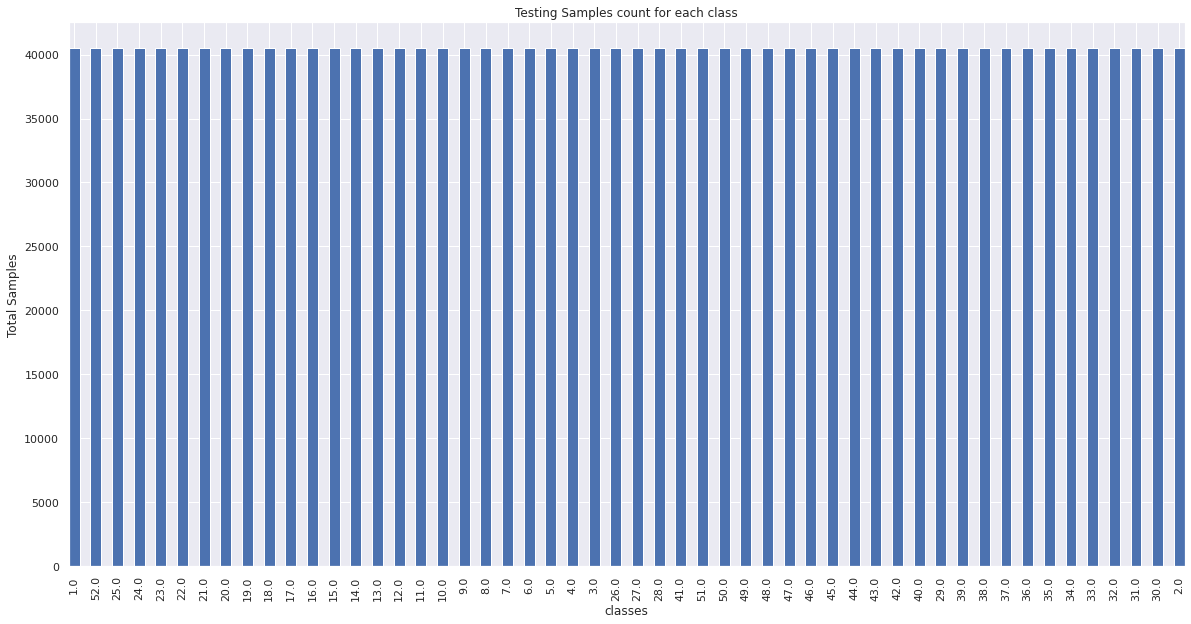

In [19]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [20]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.00719,0.00242,0.00493,0.00242,0.00245,0.00241,0.00307,0.01633,0.00241,0.00246,1.00000
1,0.00836,0.00243,0.00478,0.00242,0.00245,0.00241,0.00312,0.01699,0.00241,0.00247,1.00000
2,0.00948,0.00243,0.00464,0.00242,0.00246,0.00241,0.00316,0.01762,0.00241,0.00247,1.00000
3,0.01051,0.00243,0.00451,0.00242,0.00246,0.00241,0.00321,0.01822,0.00242,0.00248,1.00000
4,0.01142,0.00243,0.00439,0.00242,0.00246,0.00241,0.00327,0.01878,0.00242,0.00248,1.00000


In [21]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [22]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [23]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.67598,-0.64137,-0.51809,-0.43726,-0.37267,-0.45613,-0.76035,-0.90887,-0.51942,-0.77849,1.00000
1,-0.67360,-0.64136,-0.51846,-0.43725,-0.37263,-0.45613,-0.76028,-0.90759,-0.51942,-0.77848,1.00000
2,-0.67131,-0.64136,-0.51881,-0.43725,-0.37260,-0.45613,-0.76020,-0.90634,-0.51942,-0.77847,1.00000
3,-0.66920,-0.64136,-0.51915,-0.43724,-0.37256,-0.45612,-0.76012,-0.90517,-0.51942,-0.77846,1.00000
4,-0.66736,-0.64135,-0.51946,-0.43724,-0.37252,-0.45612,-0.76004,-0.90408,-0.51941,-0.77845,1.00000


In [24]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.03174,0.00247,0.00243,0.00240,0.00244,0.00240,0.00256,0.03562,0.00243,0.00241,1.00000
1,0.03204,0.00248,0.00244,0.00240,0.00245,0.00240,0.00258,0.03567,0.00244,0.00241,1.00000
2,0.03233,0.00248,0.00245,0.00240,0.00246,0.00240,0.00259,0.03570,0.00244,0.00241,1.00000
3,0.03259,0.00249,0.00246,0.00240,0.00246,0.00240,0.00260,0.03570,0.00244,0.00241,1.00000
4,0.03285,0.00249,0.00246,0.00240,0.00246,0.00240,0.00261,0.03567,0.00244,0.00241,1.00000


In [25]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.62589,-0.64123,-0.52438,-0.43731,-0.37278,-0.45618,-0.76116,-0.87110,-0.51937,-0.77862,1.00000
1,-0.62527,-0.64122,-0.52435,-0.43731,-0.37266,-0.45618,-0.76114,-0.87100,-0.51936,-0.77862,1.00000
2,-0.62469,-0.64120,-0.52433,-0.43731,-0.37257,-0.45618,-0.76113,-0.87095,-0.51936,-0.77862,1.00000
3,-0.62415,-0.64119,-0.52432,-0.43731,-0.37252,-0.45618,-0.76111,-0.87095,-0.51935,-0.77862,1.00000
4,-0.62362,-0.64117,-0.52432,-0.43731,-0.37250,-0.45618,-0.76109,-0.87100,-0.51934,-0.77862,1.00000


In [27]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0       -0.67598 -0.64137 -0.51809 -0.43726 -0.37267 -0.45613 -0.76035   
1       -0.67360 -0.64136 -0.51846 -0.43725 -0.37263 -0.45613 -0.76028   
2       -0.67131 -0.64136 -0.51881 -0.43725 -0.37260 -0.45613 -0.76020   
3       -0.66920 -0.64136 -0.51915 -0.43724 -0.37256 -0.45612 -0.76012   
4       -0.66736 -0.64135 -0.51946 -0.43724 -0.37252 -0.45612 -0.76004   
...          ...      ...      ...      ...      ...      ...      ...   
4913995 -0.41882 -0.53466 -0.51323 -0.40182 -0.37198 -0.12145 -0.40732   
4913996 -0.41806 -0.53568 -0.51350 -0.40268 -0.37201 -0.12359 -0.41241   
4913997 -0.41721 -0.53652 -0.51373 -0.40339 -0.37203 -0.12538 -0.41687   
4913998 -0.41631 -0.53722 -0.51391 -0.40397 -0.37205 -0.12682 -0.42066   
4913999 -0.41541 -0.53777 -0.51405 -0.40443 -0.37207 -0.12791 -0.42372   

              C8       C9      C10  Class_label  ActivityEncoded  
0       -0.90887 -0.51942 -0.7

In [28]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [29]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (491398, 20, 10)
491398 training samples
y_train shape:  (491398,)
20
10
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (20, 10)
input_shape: (20, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (491398, 52)


In [30]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (210598, 20, 10)
210598 testing samples
y_test shape:  (210598,)


In [31]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 20, 10
n_depth=1
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (491398, 20, 10, 1)
x_test shape:  (210598, 20, 10, 1)
n_outputs 52


In [32]:
verbose, epochs, batch_size = 0, 500, 512

In [33]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,1), padding='same', kernel_initializer="he_normal",strides=(3,1), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(MaxPooling2D(pool_size=(4,1),strides=(2,1)))
model.add(Activation('tanh'))
model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1)))
model.add(Activation('tanh'))
model.add(Dropout(0.2093))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512, activation='tanh'))
model.add(Dense(n_outputs, activation='softmax'))

In [37]:
# adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
sgd=optimizers.SGD(learning_rate=2.17e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 10, 64)         384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 10, 64)         0         
_________________________________________________________________
activation (Activation)      (None, 2, 10, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 10, 64)         20544     
_________________________________________________________________
activation_1 (Activation)    (None, 1, 10, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 10, 64)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 1, 10, 64)         0

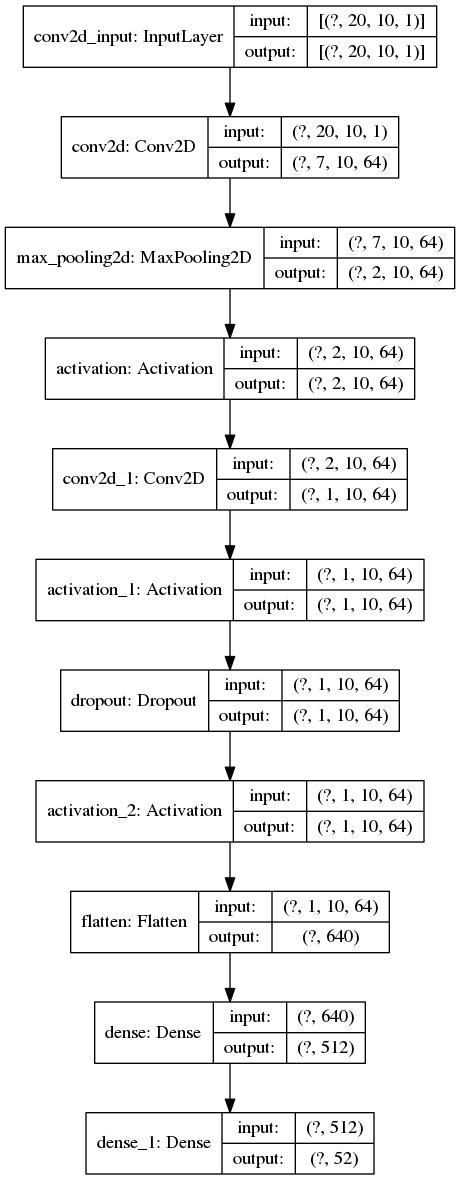

In [38]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [39]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/500
959/960 [============================>.] - ETA: 0s - loss: 2.7283 - accuracy: 0.2807
Epoch 00001: val_accuracy improved from -inf to 0.28015, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 9s 9ms/step - loss: 2.7283 - accuracy: 0.2807 - val_loss: 2.7426 - val_accuracy: 0.2801
Epoch 2/500
959/960 [============================>.] - ETA: 0s - loss: 2.7236 - accuracy: 0.2814
Epoch 00002: val_accuracy improved from 0.28015 to 0.28105, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 9s 9ms/step - loss: 2.7236 - accuracy: 0.2814 - val_loss: 2.7378 - val_accuracy: 0.2811
Epoch 3/500
957/960 [============================>.] - ETA: 0s - loss: 2.7204 - accuracy: 0.2828
Epoch 00003: val_accuracy improved from 0.28105 to 0.28204, saving model to /media/naveen/nav/mat_codes/nina_DB1_c

Epoch 24/500
955/960 [============================>.] - ETA: 0s - loss: 2.6402 - accuracy: 0.3042
Epoch 00024: val_accuracy improved from 0.29945 to 0.29975, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 8s 8ms/step - loss: 2.6400 - accuracy: 0.3042 - val_loss: 2.6653 - val_accuracy: 0.2997
Epoch 25/500
959/960 [============================>.] - ETA: 0s - loss: 2.6365 - accuracy: 0.3049
Epoch 00025: val_accuracy improved from 0.29975 to 0.30140, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 8s 9ms/step - loss: 2.6364 - accuracy: 0.3049 - val_loss: 2.6601 - val_accuracy: 0.3014
Epoch 26/500
953/960 [============================>.] - ETA: 0s - loss: 2.6329 - accuracy: 0.3062
Epoch 00026: val_accuracy improved from 0.30140 to 0.30292, saving model to /media/naveen/nav/mat_codes/nina

Epoch 47/500
958/960 [============================>.] - ETA: 0s - loss: 2.5455 - accuracy: 0.3287
Epoch 00047: val_accuracy did not improve from 0.32125
960/960 [==============================] - 8s 9ms/step - loss: 2.5453 - accuracy: 0.3288 - val_loss: 2.5877 - val_accuracy: 0.3195
Epoch 48/500
957/960 [============================>.] - ETA: 0s - loss: 2.5416 - accuracy: 0.3294
Epoch 00048: val_accuracy improved from 0.32125 to 0.32143, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 8s 9ms/step - loss: 2.5415 - accuracy: 0.3295 - val_loss: 2.5811 - val_accuracy: 0.3214
Epoch 49/500
955/960 [============================>.] - ETA: 0s - loss: 2.5378 - accuracy: 0.3310
Epoch 00049: val_accuracy improved from 0.32143 to 0.32245, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 9s 9ms/ste

Epoch 70/500
959/960 [============================>.] - ETA: 0s - loss: 2.4483 - accuracy: 0.3543
Epoch 00070: val_accuracy improved from 0.34049 to 0.34244, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 8s 8ms/step - loss: 2.4484 - accuracy: 0.3542 - val_loss: 2.5050 - val_accuracy: 0.3424
Epoch 71/500
954/960 [============================>.] - ETA: 0s - loss: 2.4448 - accuracy: 0.3547
Epoch 00071: val_accuracy did not improve from 0.34244
960/960 [==============================] - 8s 9ms/step - loss: 2.4448 - accuracy: 0.3548 - val_loss: 2.5032 - val_accuracy: 0.3422
Epoch 72/500
958/960 [============================>.] - ETA: 0s - loss: 2.4401 - accuracy: 0.3558
Epoch 00072: val_accuracy improved from 0.34244 to 0.34412, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 9s 9ms/ste

959/960 [============================>.] - ETA: 0s - loss: 2.3587 - accuracy: 0.3769
Epoch 00092: val_accuracy improved from 0.35929 to 0.35969, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 8s 9ms/step - loss: 2.3588 - accuracy: 0.3769 - val_loss: 2.4377 - val_accuracy: 0.3597
Epoch 93/500
954/960 [============================>.] - ETA: 0s - loss: 2.3560 - accuracy: 0.3778
Epoch 00093: val_accuracy improved from 0.35969 to 0.36041, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 8s 9ms/step - loss: 2.3557 - accuracy: 0.3779 - val_loss: 2.4351 - val_accuracy: 0.3604
Epoch 94/500
960/960 [==============================] - ETA: 0s - loss: 2.3513 - accuracy: 0.3787
Epoch 00094: val_accuracy improved from 0.36041 to 0.36127, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/ni

Epoch 115/500
953/960 [============================>.] - ETA: 0s - loss: 2.2743 - accuracy: 0.3988
Epoch 00115: val_accuracy improved from 0.37318 to 0.37359, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 8s 8ms/step - loss: 2.2745 - accuracy: 0.3987 - val_loss: 2.3811 - val_accuracy: 0.3736
Epoch 116/500
958/960 [============================>.] - ETA: 0s - loss: 2.2717 - accuracy: 0.3991
Epoch 00116: val_accuracy improved from 0.37359 to 0.37454, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 8s 8ms/step - loss: 2.2716 - accuracy: 0.3991 - val_loss: 2.3764 - val_accuracy: 0.3745
Epoch 117/500
951/960 [============================>.] - ETA: 0s - loss: 2.2694 - accuracy: 0.3998
Epoch 00117: val_accuracy improved from 0.37454 to 0.37485, saving model to /media/naveen/nav/mat_codes/n

952/960 [============================>.] - ETA: 0s - loss: 2.2080 - accuracy: 0.4142
Epoch 00136: val_accuracy did not improve from 0.38417
960/960 [==============================] - 7s 8ms/step - loss: 2.2076 - accuracy: 0.4143 - val_loss: 2.3367 - val_accuracy: 0.3841
Epoch 137/500
959/960 [============================>.] - ETA: 0s - loss: 2.2048 - accuracy: 0.4159
Epoch 00137: val_accuracy improved from 0.38417 to 0.38486, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 9s 9ms/step - loss: 2.2047 - accuracy: 0.4159 - val_loss: 2.3379 - val_accuracy: 0.3849
Epoch 138/500
951/960 [============================>.] - ETA: 0s - loss: 2.2021 - accuracy: 0.4155
Epoch 00138: val_accuracy improved from 0.38486 to 0.38508, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 8s 8ms/step - loss: 2

Epoch 159/500
953/960 [============================>.] - ETA: 0s - loss: 2.1456 - accuracy: 0.4301
Epoch 00159: val_accuracy did not improve from 0.39474
960/960 [==============================] - 8s 9ms/step - loss: 2.1456 - accuracy: 0.4301 - val_loss: 2.2978 - val_accuracy: 0.3932
Epoch 160/500
957/960 [============================>.] - ETA: 0s - loss: 2.1431 - accuracy: 0.4298
Epoch 00160: val_accuracy did not improve from 0.39474
960/960 [==============================] - 8s 9ms/step - loss: 2.1432 - accuracy: 0.4298 - val_loss: 2.2993 - val_accuracy: 0.3934
Epoch 161/500
954/960 [============================>.] - ETA: 0s - loss: 2.1389 - accuracy: 0.4315
Epoch 00161: val_accuracy improved from 0.39474 to 0.39511, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 9s 9ms/step - loss: 2.1390 - accuracy: 0.4315 - val_loss: 2.2977 - val_accuracy: 0.3951
Epoch 162/500
958/960 [=========

955/960 [============================>.] - ETA: 0s - loss: 2.0900 - accuracy: 0.4435
Epoch 00182: val_accuracy improved from 0.40091 to 0.40208, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 11s 12ms/step - loss: 2.0900 - accuracy: 0.4434 - val_loss: 2.2677 - val_accuracy: 0.4021
Epoch 183/500
954/960 [============================>.] - ETA: 0s - loss: 2.0885 - accuracy: 0.4430
Epoch 00183: val_accuracy did not improve from 0.40208
960/960 [==============================] - 10s 11ms/step - loss: 2.0884 - accuracy: 0.4430 - val_loss: 2.2751 - val_accuracy: 0.4016
Epoch 184/500
954/960 [============================>.] - ETA: 0s - loss: 2.0863 - accuracy: 0.4445
Epoch 00184: val_accuracy improved from 0.40208 to 0.40218, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 9s 10ms/step - lo

Epoch 207/500
953/960 [============================>.] - ETA: 0s - loss: 2.0406 - accuracy: 0.4537
Epoch 00207: val_accuracy did not improve from 0.40917
960/960 [==============================] - 8s 9ms/step - loss: 2.0409 - accuracy: 0.4536 - val_loss: 2.2469 - val_accuracy: 0.4082
Epoch 208/500
955/960 [============================>.] - ETA: 0s - loss: 2.0402 - accuracy: 0.4550
Epoch 00208: val_accuracy did not improve from 0.40917
960/960 [==============================] - 9s 9ms/step - loss: 2.0401 - accuracy: 0.4551 - val_loss: 2.2496 - val_accuracy: 0.4076
Epoch 209/500
957/960 [============================>.] - ETA: 0s - loss: 2.0385 - accuracy: 0.4551
Epoch 00209: val_accuracy did not improve from 0.40917
960/960 [==============================] - 8s 9ms/step - loss: 2.0386 - accuracy: 0.4551 - val_loss: 2.2445 - val_accuracy: 0.4088
Epoch 210/500
954/960 [============================>.] - ETA: 0s - loss: 2.0354 - accuracy: 0.4558
Epoch 00210: val_accuracy did not improve from

Epoch 232/500
955/960 [============================>.] - ETA: 0s - loss: 1.9996 - accuracy: 0.4646
Epoch 00232: val_accuracy did not improve from 0.41403
960/960 [==============================] - 9s 9ms/step - loss: 2.0001 - accuracy: 0.4645 - val_loss: 2.2323 - val_accuracy: 0.4112
Epoch 233/500
956/960 [============================>.] - ETA: 0s - loss: 1.9980 - accuracy: 0.4648
Epoch 00233: val_accuracy did not improve from 0.41403
960/960 [==============================] - 9s 10ms/step - loss: 1.9979 - accuracy: 0.4648 - val_loss: 2.2316 - val_accuracy: 0.4139
Epoch 234/500
960/960 [==============================] - ETA: 0s - loss: 1.9963 - accuracy: 0.4647
Epoch 00234: val_accuracy did not improve from 0.41403
960/960 [==============================] - 10s 10ms/step - loss: 1.9963 - accuracy: 0.4647 - val_loss: 2.2289 - val_accuracy: 0.4132
Epoch 235/500
957/960 [============================>.] - ETA: 0s - loss: 1.9945 - accuracy: 0.4650
Epoch 00235: val_accuracy did not improve f

958/960 [============================>.] - ETA: 0s - loss: 1.9632 - accuracy: 0.4730
Epoch 00258: val_accuracy did not improve from 0.41802
960/960 [==============================] - 9s 9ms/step - loss: 1.9633 - accuracy: 0.4730 - val_loss: 2.2146 - val_accuracy: 0.4175
Epoch 259/500
955/960 [============================>.] - ETA: 0s - loss: 1.9622 - accuracy: 0.4730
Epoch 00259: val_accuracy did not improve from 0.41802
960/960 [==============================] - 8s 9ms/step - loss: 1.9624 - accuracy: 0.4730 - val_loss: 2.2157 - val_accuracy: 0.4176
Epoch 260/500
954/960 [============================>.] - ETA: 0s - loss: 1.9606 - accuracy: 0.4729
Epoch 00260: val_accuracy did not improve from 0.41802
960/960 [==============================] - 9s 9ms/step - loss: 1.9605 - accuracy: 0.4730 - val_loss: 2.2161 - val_accuracy: 0.4168
Epoch 261/500
954/960 [============================>.] - ETA: 0s - loss: 1.9603 - accuracy: 0.4730
Epoch 00261: val_accuracy did not improve from 0.41802
960/9

958/960 [============================>.] - ETA: 0s - loss: 1.9323 - accuracy: 0.4792
Epoch 00284: val_accuracy did not improve from 0.42075
960/960 [==============================] - 9s 10ms/step - loss: 1.9323 - accuracy: 0.4792 - val_loss: 2.2110 - val_accuracy: 0.4205
Epoch 285/500
953/960 [============================>.] - ETA: 0s - loss: 1.9316 - accuracy: 0.4805
Epoch 00285: val_accuracy improved from 0.42075 to 0.42107, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 9s 9ms/step - loss: 1.9316 - accuracy: 0.4805 - val_loss: 2.2054 - val_accuracy: 0.4211
Epoch 286/500
959/960 [============================>.] - ETA: 0s - loss: 1.9310 - accuracy: 0.4803
Epoch 00286: val_accuracy did not improve from 0.42107
960/960 [==============================] - 9s 9ms/step - loss: 1.9310 - accuracy: 0.4803 - val_loss: 2.2065 - val_accuracy: 0.4207
Epoch 287/500
956/960 [======================

954/960 [============================>.] - ETA: 0s - loss: 1.9068 - accuracy: 0.4864
Epoch 00310: val_accuracy did not improve from 0.42394
960/960 [==============================] - 7s 7ms/step - loss: 1.9068 - accuracy: 0.4864 - val_loss: 2.1969 - val_accuracy: 0.4238
Epoch 311/500
958/960 [============================>.] - ETA: 0s - loss: 1.9049 - accuracy: 0.4862
Epoch 00311: val_accuracy did not improve from 0.42394
960/960 [==============================] - 7s 7ms/step - loss: 1.9049 - accuracy: 0.4862 - val_loss: 2.2004 - val_accuracy: 0.4232
Epoch 312/500
951/960 [============================>.] - ETA: 0s - loss: 1.9040 - accuracy: 0.4863
Epoch 00312: val_accuracy did not improve from 0.42394
960/960 [==============================] - 7s 7ms/step - loss: 1.9040 - accuracy: 0.4863 - val_loss: 2.2020 - val_accuracy: 0.4223
Epoch 313/500
955/960 [============================>.] - ETA: 0s - loss: 1.9020 - accuracy: 0.4871
Epoch 00313: val_accuracy did not improve from 0.42394
960/9

Epoch 338/500
956/960 [============================>.] - ETA: 0s - loss: 1.8819 - accuracy: 0.4913
Epoch 00338: val_accuracy did not improve from 0.42594
960/960 [==============================] - 7s 7ms/step - loss: 1.8818 - accuracy: 0.4913 - val_loss: 2.1946 - val_accuracy: 0.4248
Epoch 339/500
958/960 [============================>.] - ETA: 0s - loss: 1.8813 - accuracy: 0.4917
Epoch 00339: val_accuracy did not improve from 0.42594
960/960 [==============================] - 7s 7ms/step - loss: 1.8814 - accuracy: 0.4916 - val_loss: 2.1968 - val_accuracy: 0.4245
Epoch 340/500
951/960 [============================>.] - ETA: 0s - loss: 1.8807 - accuracy: 0.4924
Epoch 00340: val_accuracy did not improve from 0.42594
960/960 [==============================] - 6s 7ms/step - loss: 1.8810 - accuracy: 0.4923 - val_loss: 2.1909 - val_accuracy: 0.4257
Epoch 341/500
952/960 [============================>.] - ETA: 0s - loss: 1.8780 - accuracy: 0.4930
Epoch 00341: val_accuracy did not improve from

Epoch 364/500
950/960 [============================>.] - ETA: 0s - loss: 1.8635 - accuracy: 0.4958
Epoch 00364: val_accuracy did not improve from 0.42744
960/960 [==============================] - 7s 7ms/step - loss: 1.8637 - accuracy: 0.4957 - val_loss: 2.1880 - val_accuracy: 0.4272
Epoch 365/500
956/960 [============================>.] - ETA: 0s - loss: 1.8616 - accuracy: 0.4957
Epoch 00365: val_accuracy improved from 0.42744 to 0.42760, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 7s 7ms/step - loss: 1.8617 - accuracy: 0.4957 - val_loss: 2.1849 - val_accuracy: 0.4276
Epoch 366/500
957/960 [============================>.] - ETA: 0s - loss: 1.8621 - accuracy: 0.4958
Epoch 00366: val_accuracy did not improve from 0.42760
960/960 [==============================] - 6s 7ms/step - loss: 1.8622 - accuracy: 0.4958 - val_loss: 2.1912 - val_accuracy: 0.4268
Epoch 367/500
955/960 [=========

Epoch 390/500
959/960 [============================>.] - ETA: 0s - loss: 1.8458 - accuracy: 0.4997
Epoch 00390: val_accuracy did not improve from 0.42955
960/960 [==============================] - 7s 7ms/step - loss: 1.8459 - accuracy: 0.4997 - val_loss: 2.1894 - val_accuracy: 0.4270
Epoch 391/500
954/960 [============================>.] - ETA: 0s - loss: 1.8445 - accuracy: 0.5002
Epoch 00391: val_accuracy did not improve from 0.42955
960/960 [==============================] - 7s 7ms/step - loss: 1.8444 - accuracy: 0.5003 - val_loss: 2.1844 - val_accuracy: 0.4290
Epoch 392/500
953/960 [============================>.] - ETA: 0s - loss: 1.8429 - accuracy: 0.5006
Epoch 00392: val_accuracy did not improve from 0.42955
960/960 [==============================] - 7s 7ms/step - loss: 1.8427 - accuracy: 0.5006 - val_loss: 2.1861 - val_accuracy: 0.4286
Epoch 393/500
955/960 [============================>.] - ETA: 0s - loss: 1.8430 - accuracy: 0.5012
Epoch 00393: val_accuracy did not improve from

Epoch 418/500
955/960 [============================>.] - ETA: 0s - loss: 1.8289 - accuracy: 0.5037
Epoch 00418: val_accuracy improved from 0.43060 to 0.43070, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 7s 7ms/step - loss: 1.8289 - accuracy: 0.5037 - val_loss: 2.1818 - val_accuracy: 0.4307
Epoch 419/500
960/960 [==============================] - ETA: 0s - loss: 1.8277 - accuracy: 0.5041
Epoch 00419: val_accuracy did not improve from 0.43070
960/960 [==============================] - 7s 7ms/step - loss: 1.8277 - accuracy: 0.5041 - val_loss: 2.1839 - val_accuracy: 0.4298
Epoch 420/500
953/960 [============================>.] - ETA: 0s - loss: 1.8286 - accuracy: 0.5034
Epoch 00420: val_accuracy did not improve from 0.43070
960/960 [==============================] - 7s 7ms/step - loss: 1.8288 - accuracy: 0.5034 - val_loss: 2.1812 - val_accuracy: 0.4303
Epoch 421/500
956/960 [=========

957/960 [============================>.] - ETA: 0s - loss: 1.8155 - accuracy: 0.5068
Epoch 00445: val_accuracy did not improve from 0.43222
960/960 [==============================] - 7s 7ms/step - loss: 1.8155 - accuracy: 0.5068 - val_loss: 2.1787 - val_accuracy: 0.4309
Epoch 446/500
954/960 [============================>.] - ETA: 0s - loss: 1.8155 - accuracy: 0.5067
Epoch 00446: val_accuracy did not improve from 0.43222
960/960 [==============================] - 7s 7ms/step - loss: 1.8154 - accuracy: 0.5067 - val_loss: 2.1831 - val_accuracy: 0.4312
Epoch 447/500
950/960 [============================>.] - ETA: 0s - loss: 1.8147 - accuracy: 0.5066
Epoch 00447: val_accuracy improved from 0.43222 to 0.43307, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/checkpoint.hdf5
960/960 [==============================] - 7s 7ms/step - loss: 1.8142 - accuracy: 0.5067 - val_loss: 2.1733 - val_accuracy: 0.4331
Epoch 448/500
953/960 [=======================

Epoch 472/500
959/960 [============================>.] - ETA: 0s - loss: 1.8026 - accuracy: 0.5104
Epoch 00472: val_accuracy did not improve from 0.43430
960/960 [==============================] - 6s 7ms/step - loss: 1.8026 - accuracy: 0.5104 - val_loss: 2.1756 - val_accuracy: 0.4324
Epoch 473/500
954/960 [============================>.] - ETA: 0s - loss: 1.8029 - accuracy: 0.5095
Epoch 00473: val_accuracy did not improve from 0.43430
960/960 [==============================] - 7s 7ms/step - loss: 1.8028 - accuracy: 0.5095 - val_loss: 2.1809 - val_accuracy: 0.4315
Epoch 474/500
951/960 [============================>.] - ETA: 0s - loss: 1.8024 - accuracy: 0.5092
Epoch 00474: val_accuracy did not improve from 0.43430
960/960 [==============================] - 7s 7ms/step - loss: 1.8028 - accuracy: 0.5091 - val_loss: 2.1811 - val_accuracy: 0.4327
Epoch 475/500
957/960 [============================>.] - ETA: 0s - loss: 1.8011 - accuracy: 0.5096
Epoch 00475: val_accuracy did not improve from

In [40]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])

epoch_number 470
train accuracy and validation accuracy 0.5097334384918213 0.4342966079711914


In [41]:
model.save('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/CNN_LSTM_nina_5X97')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy


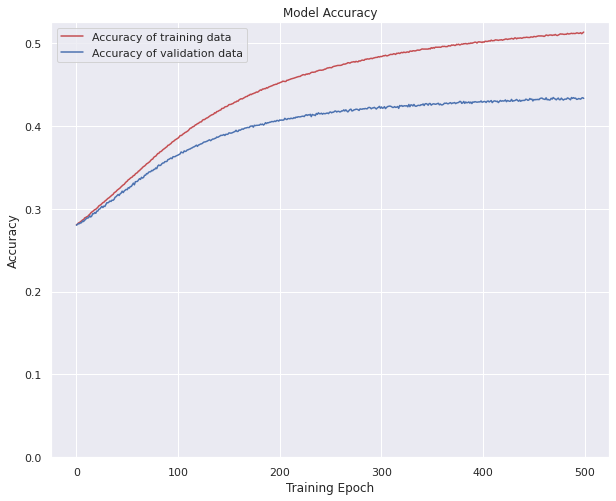

In [42]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy


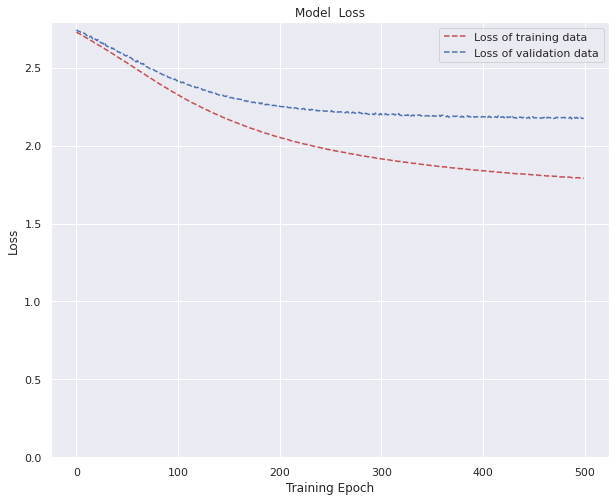

In [43]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [44]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

412/412 [==============================] - 2s 4ms/step - loss: 2.1730 - accuracy: 0.4343
test_accuracy 0.4342966079711914


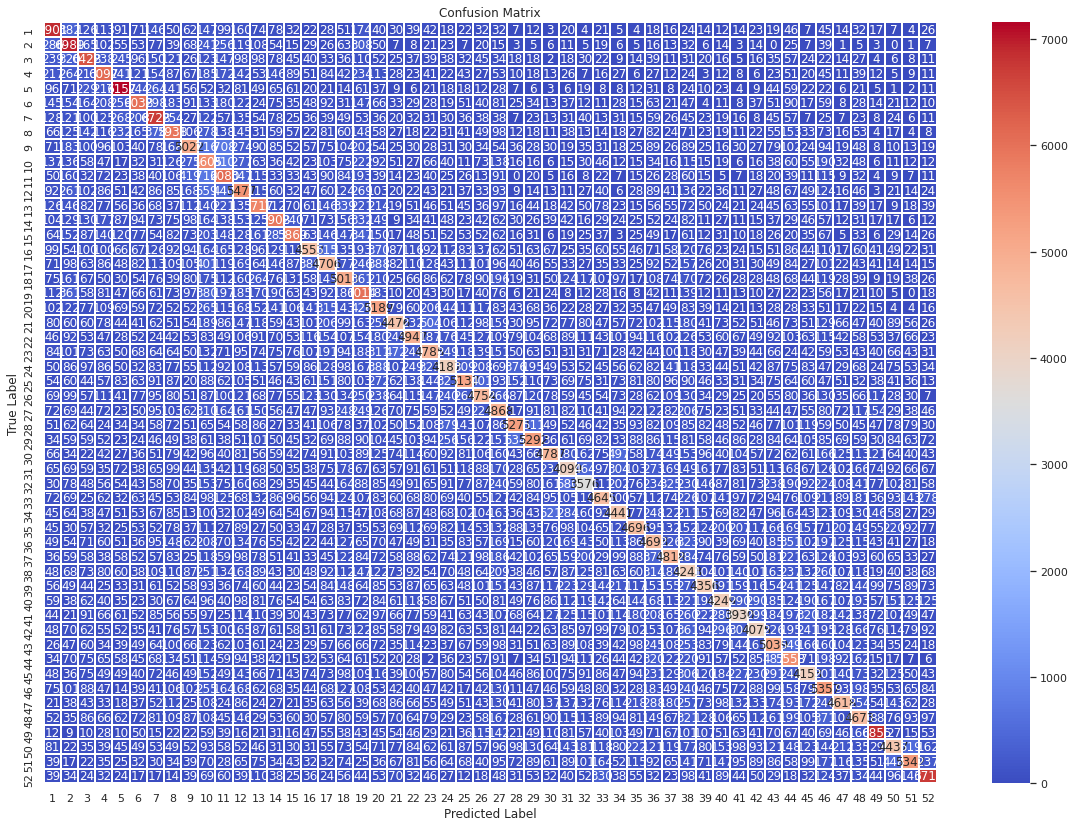

              precision    recall  f1-score   support

           0       0.64      0.73      0.68      9476
           1       0.57      0.74      0.65      9450
           2       0.62      0.68      0.65      9450
           3       0.61      0.65      0.63      9450
           4       0.68      0.76      0.71      9450
           5       0.66      0.64      0.65      9450
           6       0.61      0.71      0.66      9450
           7       0.58      0.63      0.60      9450
           8       0.58      0.53      0.55      9450
           9       0.38      0.59      0.46      9450
          10       0.49      0.64      0.56      9450
          11       0.46      0.58      0.51      9450
          12       0.57      0.60      0.59      9450
          13       0.62      0.63      0.62      9450
          14       0.69      0.62      0.65      9450
          15       0.60      0.48      0.54      9450
          16       0.49      0.50      0.49      9450
          17       0.49    

In [45]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

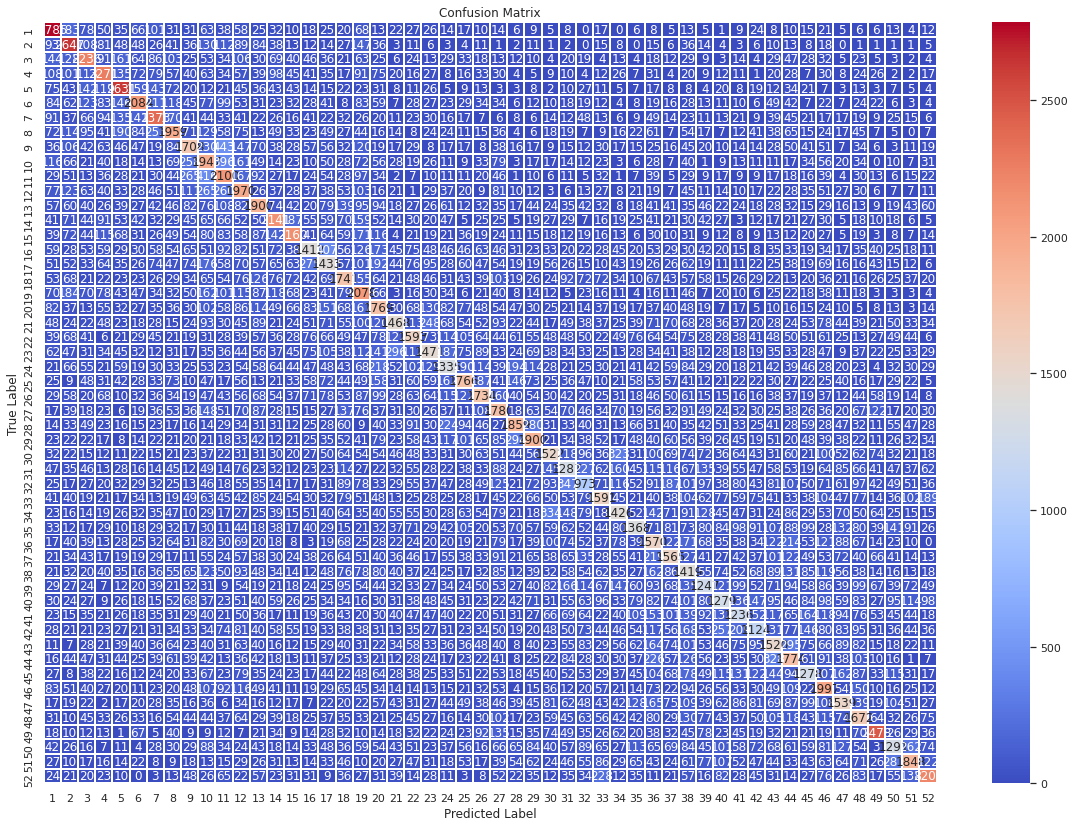

              precision    recall  f1-score   support

           0       0.55      0.68      0.61      4076
           1       0.51      0.65      0.58      4050
           2       0.51      0.55      0.53      4050
           3       0.54      0.56      0.55      4050
           4       0.57      0.65      0.60      4050
           5       0.55      0.51      0.53      4050
           6       0.52      0.59      0.55      4050
           7       0.46      0.48      0.47      4050
           8       0.43      0.42      0.43      4050
           9       0.33      0.48      0.39      4050
          10       0.40      0.52      0.45      4050
          11       0.38      0.49      0.42      4050
          12       0.44      0.47      0.45      4050
          13       0.51      0.53      0.52      4050
          14       0.58      0.53      0.55      4050
          15       0.43      0.35      0.39      4050
          16       0.36      0.35      0.36      4050
          17       0.40    

In [46]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))